# Single-cell RNAseq vs imaging

First we load the two avaialble eye-disc scRNAseq datasets


In [1]:
from matplotlib import pyplot as plt
import numpy as np
from rnaseq3 import RNAseq as RNAseq3

rnaseq = RNAseq3('~/Google Drive File Stream/My Drive/Projects/RDN-WDP/contrib/scRNAseq/EyeAntennal_Combined_DG2_v4.csv')
rnaseq3 = RNAseq3('~/Google Drive File Stream/My Drive/Projects/RDN-WDP/contrib/GSE115476_RAW/GSM3178869_DMS.expr.txt')
aerts = rnaseq.data
ariss = rnaseq3.data


#### Aerts

In [2]:
ato = aerts[(aerts['ato'] > 0)]['ato'].agg(['mean', 'count'])
ato

mean       1.945946
count    333.000000
Name: ato, dtype: float64

In [3]:
total = aerts['ato'].agg(['mean', 'count'])
total

mean        0.27204
count    2382.00000
Name: ato, dtype: float64

In [4]:
ato.loc['count'] / total.loc['count']

0.1397984886649874

#### Ariss

In [5]:
ato = ariss[(ariss['ato'] > 0)]['ato'].agg(['mean', 'count'])
ato

mean       1.207547
count    265.000000
Name: ato, dtype: float64

In [6]:
total = ariss['ato'].agg(['mean', 'count'])
total

mean         0.013284
count    24089.000000
Name: ato, dtype: float64

In [7]:
ato.loc['count'] / total.loc['count']

0.011000871767196645

Let's look at the number of ato-positive cells within the MF.
According to [Ariss et al.](https://www.nature.com/articles/s41467-018-07540-z) MF cells can be identified
by the expression of `E(spl)m4-BFM` and `E(spl)mgamma-HLH`.

#### Aerts

In [8]:
mf = aerts[(aerts['E(spl)m4-BFM'] > 0)&(aerts['E(spl)mgamma-HLH'] > 0)]['ato'].count()
ato_mf = aerts[(aerts['E(spl)m4-BFM'] > 0)&(aerts['E(spl)mgamma-HLH'] > 0)&(aerts['ato'] > 0)]['ato'].count()
(mf, ato_mf, ato_mf / mf)

(526, 142, 0.26996197718631176)

#### Ariss

In [9]:
mf = ariss[(ariss['E(spl)m4-BFM'] > 0)&(ariss['E(spl)mgamma-HLH'] > 0)]['ato'].count()
ato_mf = ariss[(ariss['E(spl)m4-BFM'] > 0)&(ariss['E(spl)mgamma-HLH'] > 0)&(ariss['ato'] > 0)]['ato'].count()
(mf, ato_mf, ato_mf / mf)

(1551, 77, 0.04964539007092199)

Are there any non-MF ato-positive cells that express elav?

#### Aerts

In [10]:
ato = aerts[(aerts['E(spl)m4-BFM'] == 0)&(aerts['E(spl)mgamma-HLH'] == 0)&(aerts['ato'] > 0)]['ato'].count()
ato_elav = aerts[(aerts['E(spl)m4-BFM'] == 0)&(aerts['E(spl)mgamma-HLH'] == 0)&(aerts['ato'] > 0)&(aerts['elav'] > 0)]['ato'].count()
ato_sens = aerts[(aerts['ato'] > 0)&(aerts['sens'] > 0)]['ato'].count()
ato_elav_sens = aerts[(aerts['ato'] > 0)&(aerts['elav'] > 0)&(aerts['sens'] > 0)]['ato'].count()
(ato, ato_elav, ato_elav / ato, ato_sens, ato_elav_sens)

(128, 88, 0.6875, 71, 67)

#### Ariss

In [11]:
ato = ariss[(ariss['E(spl)m4-BFM'] == 0)&(ariss['E(spl)mgamma-HLH'] == 0)&(ariss['ato'] > 0)]['ato'].count()
ato_elav = ariss[(ariss['E(spl)m4-BFM'] == 0)&(ariss['E(spl)mgamma-HLH'] == 0)&(ariss['ato'] > 0)&(ariss['elav'] > 0)]['ato'].count()
ato_sens = ariss[(ariss['ato'] > 0)&(ariss['sens'] > 0)]['ato'].count()
ato_elav_sens = ariss[(ariss['ato'] > 0)&(ariss['sens'] > 0)&(ariss['elav'] > 0)]['ato'].count()
(ato, ato_elav, ato_elav / ato, ato_sens, ato_elav_sens)

(128, 24, 0.1875, 19, 12)

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


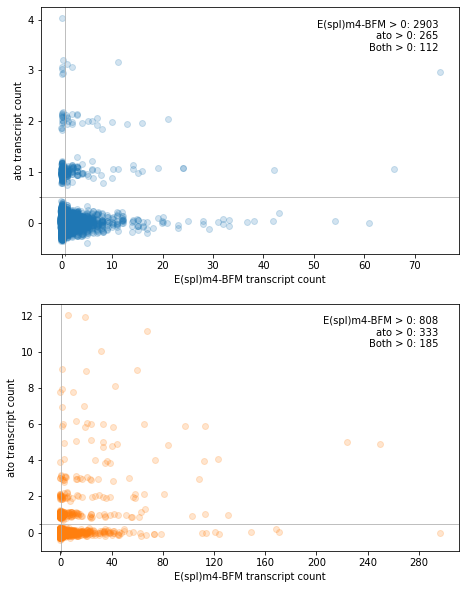

In [12]:
from matplotlib.ticker import MaxNLocator, FixedLocator

def plotgenes(gene1, gene2):
    fig, (ax1,ax2) = plt.subplots(2, 1, sharex=False, sharey=False, figsize=(7.5, 10))
    for (ds, ax, c) in [(ariss, ax1, 'C0'), (aerts, ax2, 'C1')]:
        x = ds[gene1] + np.random.normal(0, 0.1, size=len(ds.index)).tolist()
        y = ds[gene2] + np.random.normal(0, 0.1, size=len(ds.index)).tolist()
        ax.scatter(x, y, alpha=0.2, c=c)
        ax.set_xlabel(str(gene1) + ' transcript count')
        ax.set_ylabel(str(gene2) + ' transcript count')
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.yaxis.set_minor_locator(FixedLocator([0.5]))
        ax.xaxis.set_minor_locator(FixedLocator([0.5]))
        ax.yaxis.set_tick_params(labelleft=True)
        ax.grid(which='minor')
        n1 = len(ds[(ds[gene1] > 0)].index)
        n2 = len(ds[(ds[gene2] > 0)].index)
        n = len(ds[(ds[gene1] > 0) & (ds[gene2] > 0)].index)
        ax.text(0.95, 0.95, gene1 + ' > 0: ' + str(n1) + '\n' + gene2 + ' > 0: ' + str(n2) + '\n' + 'Both > 0: ' + str(n),
            horizontalalignment='right', verticalalignment='top', transform = ax.transAxes)
    fig.show()

plotgenes('E(spl)m4-BFM', 'ato')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


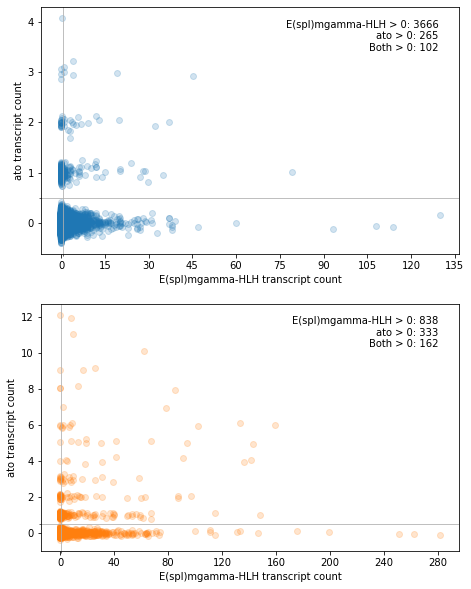

In [13]:
plotgenes('E(spl)mgamma-HLH', 'ato')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


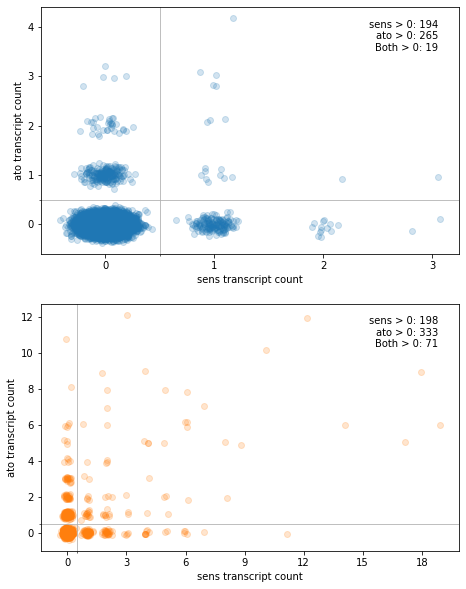

In [14]:
plotgenes('sens', 'ato')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


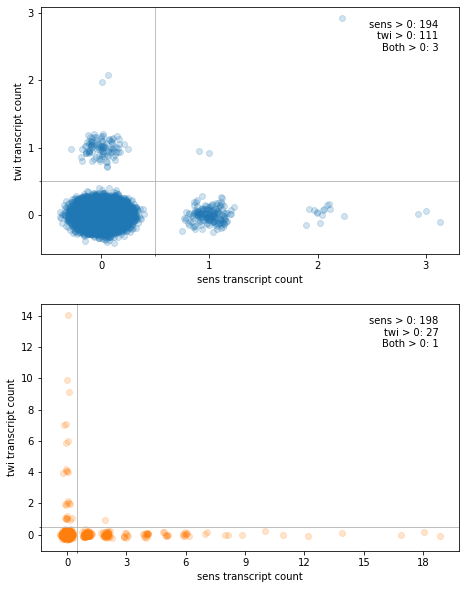

In [15]:
plotgenes('sens', 'twi')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


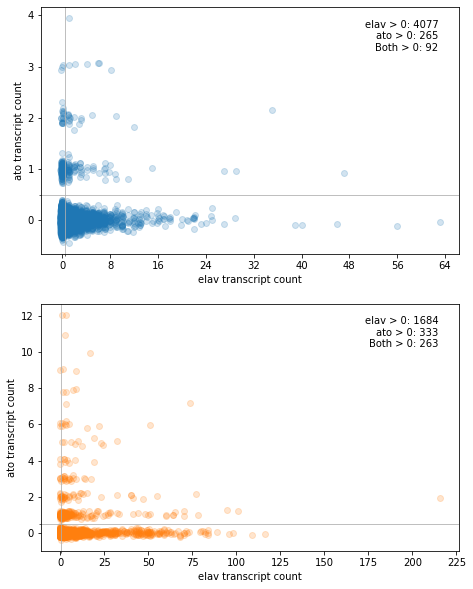

In [16]:
plotgenes('elav', 'ato')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


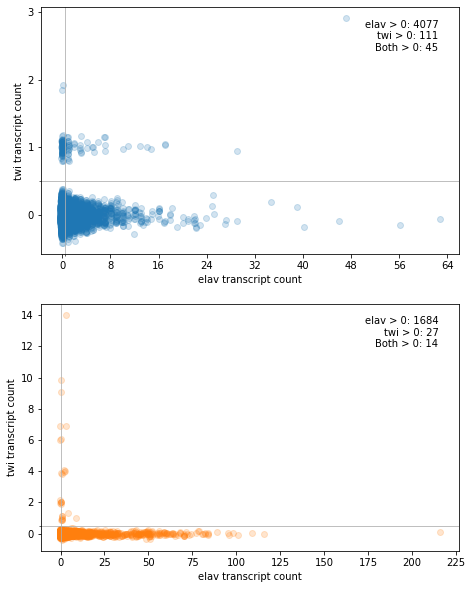

In [17]:
plotgenes('elav', 'twi')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


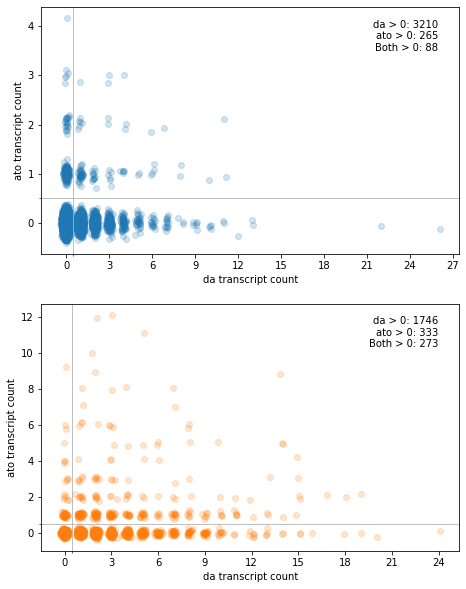

In [18]:
plotgenes('da', 'ato')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


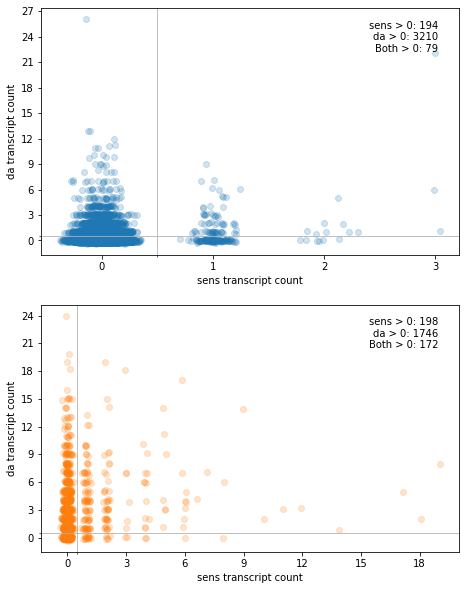

In [19]:
plotgenes('sens', 'da')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


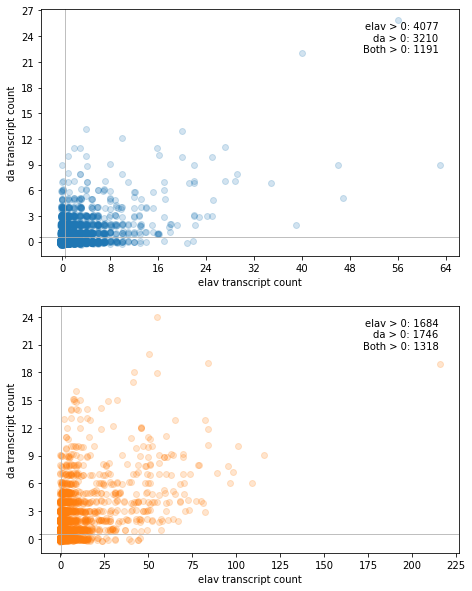

In [20]:
plotgenes('elav', 'da')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


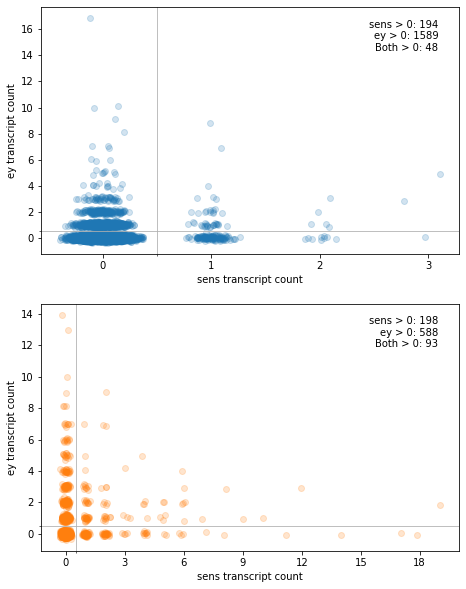

In [21]:
plotgenes('sens', 'ey')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


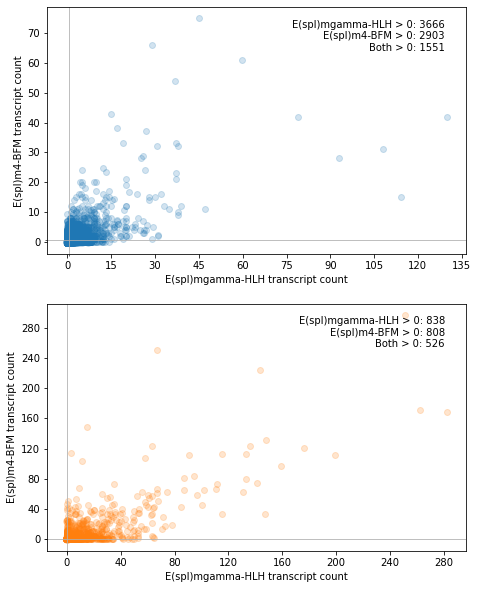

In [22]:
plotgenes('E(spl)mgamma-HLH', 'E(spl)m4-BFM')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


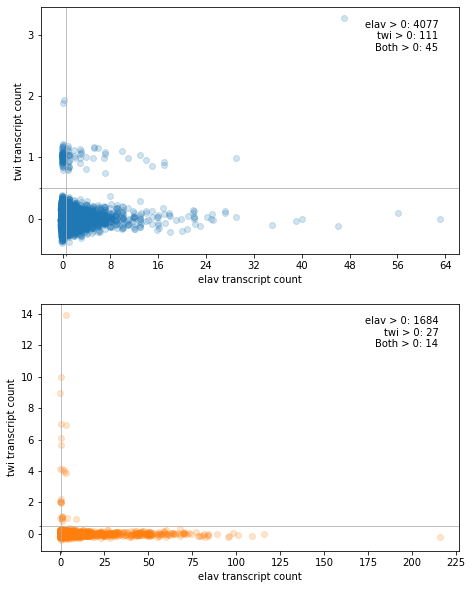

In [23]:
plotgenes('elav', 'twi')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


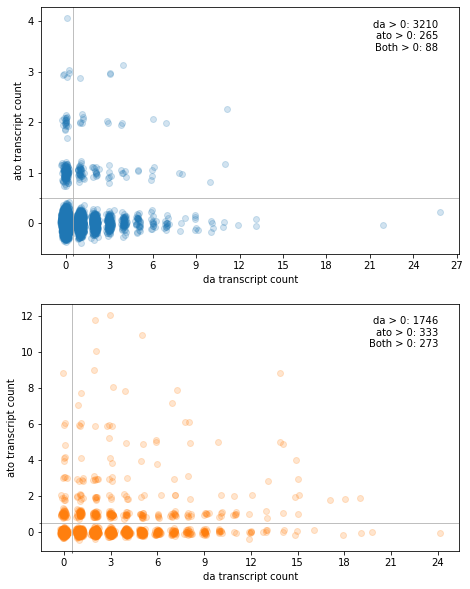

In [24]:
plotgenes('da', 'ato')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


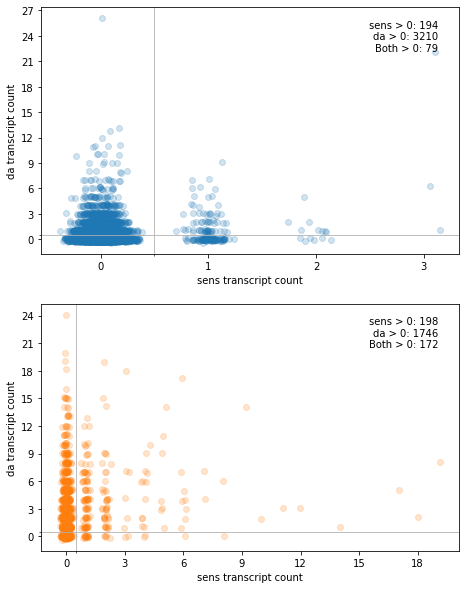

In [25]:
plotgenes('sens', 'da')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


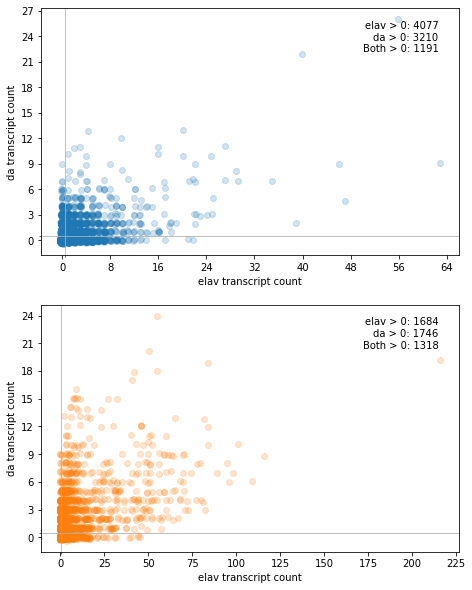

In [26]:
plotgenes('elav', 'da')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


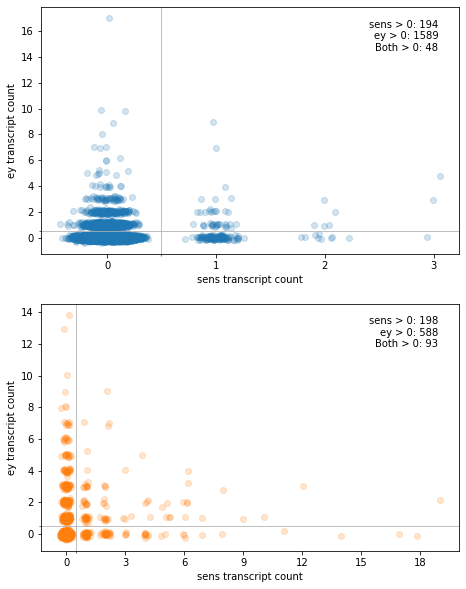

In [27]:
plotgenes('sens', 'ey')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


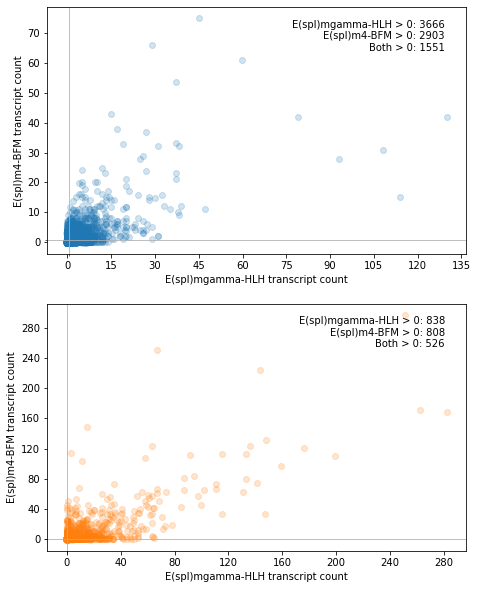

In [28]:
plotgenes('E(spl)mgamma-HLH', 'E(spl)m4-BFM')